# About the Dataset

Dream Housing Finance company deals in all home loans. They have presence across all urban, semi urban and rural areas. Customer first apply for home loan after that company validates the customer eligibility for loan. Company wants to automate the loan eligibility process (real time) based on customer detail provided while filling online application form. These details are Gender, Marital Status, Education, Number of Dependents, Income, Loan Amount, Credit History and others. To automate this process, they have given a problem to identify the customers segments, those are eligible for loan amount so that they can specifically target these customers.

This is a standard supervised classification task.A classification problem where we have to predict whether a loan would be approved or not. Below is the dataset attributes with description.

Variable --------------Description

Loan_ID	Unique  ---------   Loan ID

Gender	 -------------  Male/ Female

Married	Applicant ---------------    married (Y/N)

Dependents	 ---------         Number of dependents

Education   --------------	          Applicant Education (Graduate/ Under Graduate)

Self_Employed  -----------	      Self employed (Y/N)

ApplicantIncome	  -------       Applicant income

CoapplicantIncome -----------   Coapplicant income

LoanAmount	 -------------       Loan amount in thousands

Loan_Amount_Term  -----------	    Term of loan in months

Credit_History	 ------------       credit history meets guidelines

Property_Area	-----------         Urban/ Semi Urban/ Rural

Loan_Status	Loan  ----------       approved (Y/N)

In [846]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline


In [847]:
test=pd.read_csv('test_Y3wMUE5_7gLdaTN.csv')

In [848]:
train=pd.read_csv('train_u6lujuX_CVtuZ9i.csv')

In [849]:
test.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,LP001015,Male,Yes,0,Graduate,No,5720,0,110.0,360.0,1.0,Urban
1,LP001022,Male,Yes,1,Graduate,No,3076,1500,126.0,360.0,1.0,Urban
2,LP001031,Male,Yes,2,Graduate,No,5000,1800,208.0,360.0,1.0,Urban
3,LP001035,Male,Yes,2,Graduate,No,2340,2546,100.0,360.0,NaN,Urban
4,LP001051,Male,No,0,Not Graduate,No,3276,0,78.0,360.0,1.0,Urban


In [850]:
train.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [851]:
train.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


There r some missing values in LoanAmount, Loan_Amount_Term, Credit_History all are Numerical type

In [852]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


we can label encode Gender ,Married, Dependents, Education, Self_Employed, Credit_History, Loan_Status

# EXPLORATORY DATA ANALYSIS

In [853]:
# CATEGORICAL ANALYSIS

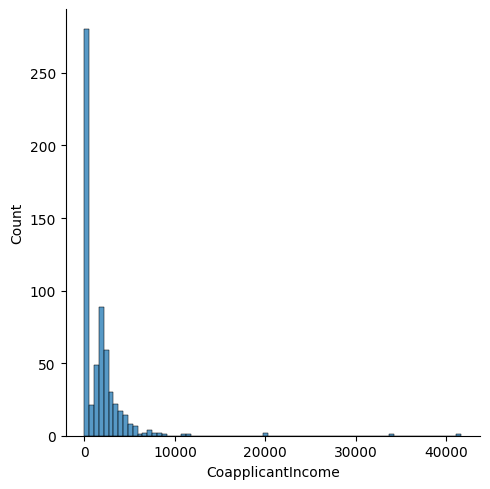

In [854]:
sns.displot(data=train['CoapplicantIncome'],legend=True)

the above data is right skewed it needs to be 

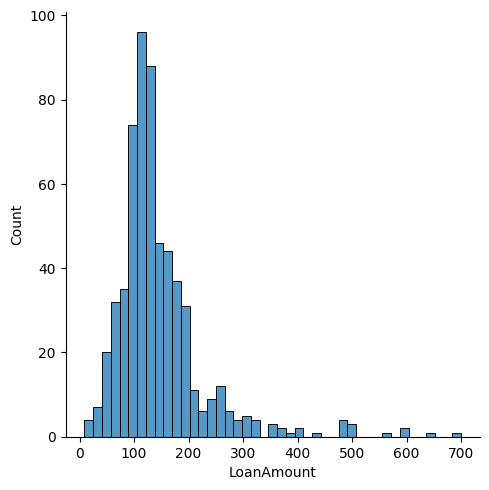

In [855]:
sns.displot(train['LoanAmount'])

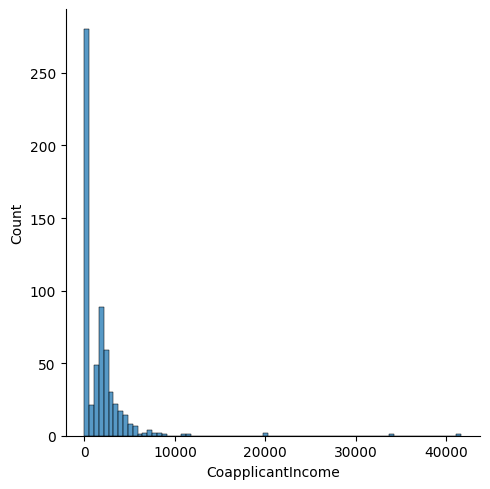

In [856]:
sns.displot(data=train['CoapplicantIncome'],legend=True)

the above data is right skewed it needs to be

Male are approaching for loan more than female

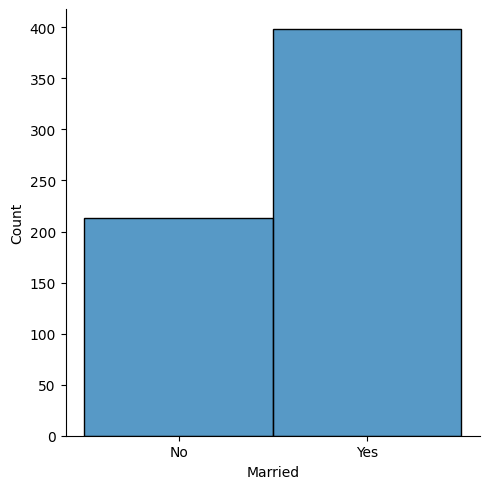

In [857]:
sns.displot(data=train['Married'],legend=True)

Married couple may have more expenses so they need loan more than unmarried

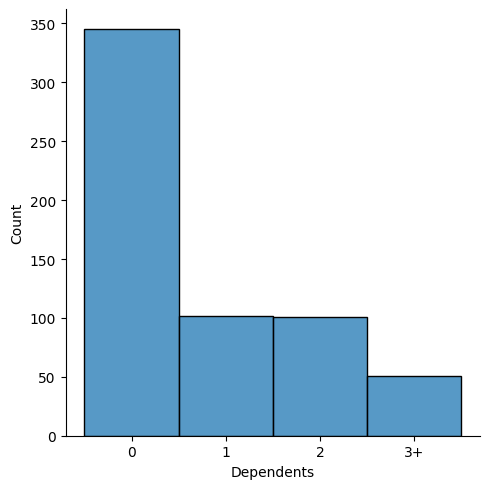

In [858]:
sns.displot(data=train['Dependents'],legend=True)

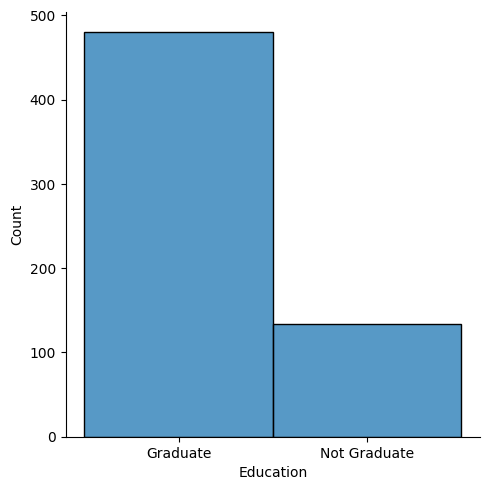

In [859]:
sns.displot(data=train['Education'],legend=True)

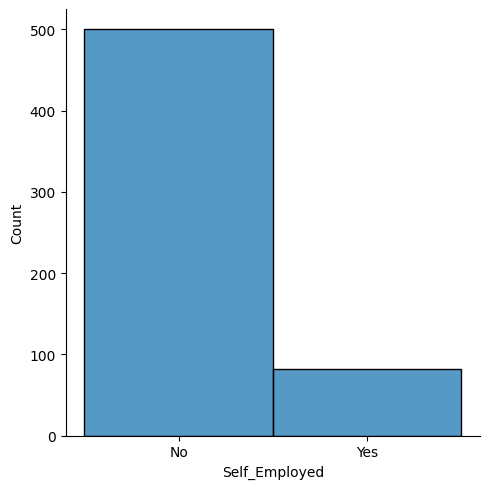

In [860]:
sns.displot(data=train['Self_Employed'],legend=True)

those who are not self employed approach banks for the loan like (Home loan,car loan)

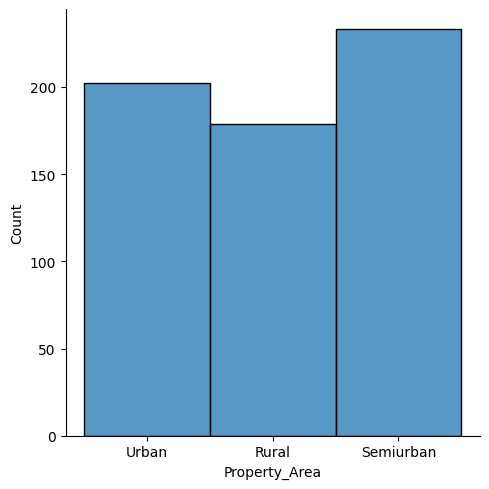

In [861]:
sns.displot(data=train['Property_Area'],legend=True)

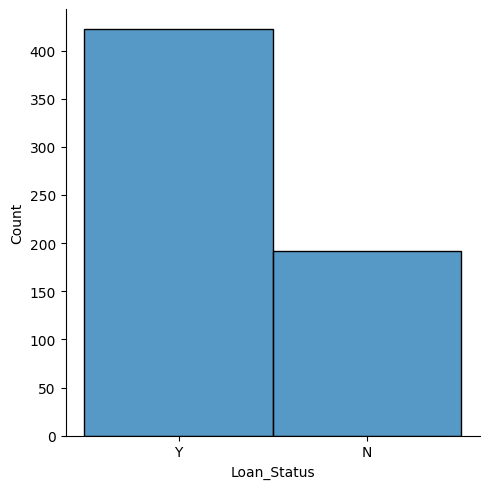

In [862]:
sns.displot(data=train['Loan_Status'],legend=True)

Most of the loan are approved by bank

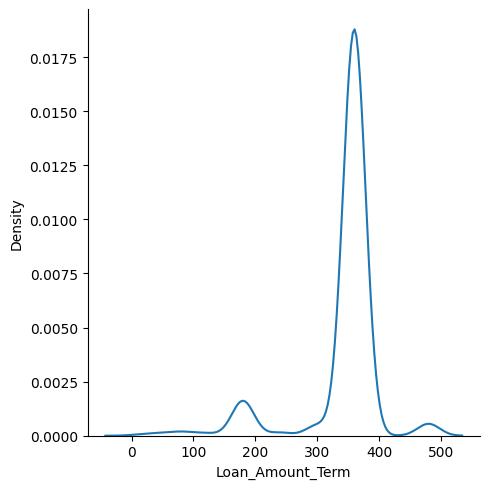

In [863]:
sns.displot(train['Loan_Amount_Term'],kind='kde')

1 yr is the most common period of the loan

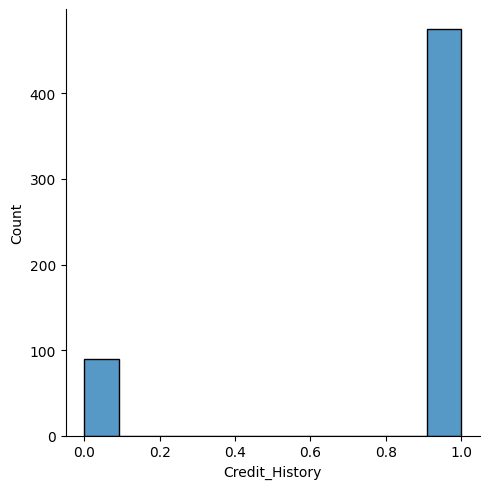

In [864]:
sns.displot(train['Credit_History'])

<AxesSubplot:xlabel='Credit_History', ylabel='Loan_Amount_Term'>

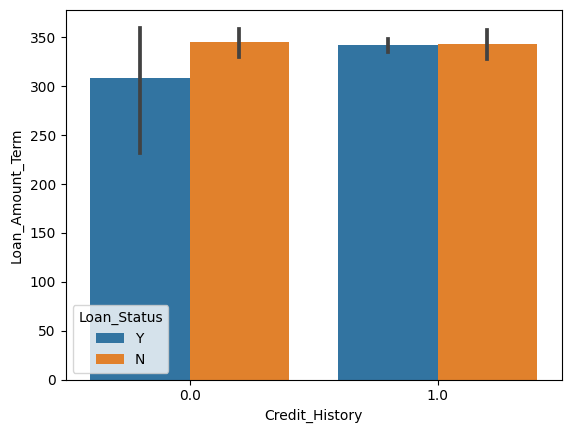

In [865]:
sns.barplot(data=train, x="Credit_History", y="Loan_Amount_Term", hue='Loan_Status')

<AxesSubplot:xlabel='Education', ylabel='Loan_Amount_Term'>

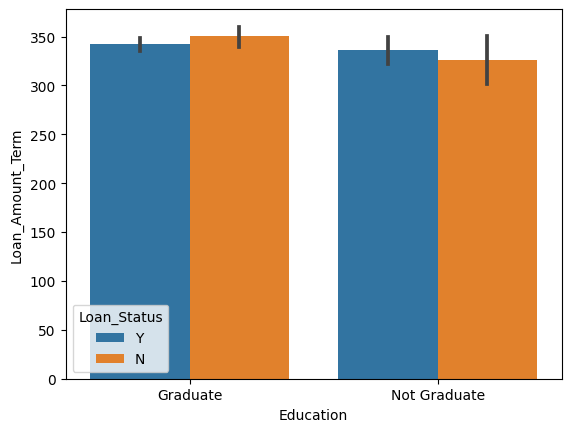

In [866]:
sns.barplot(data=train, x="Education", y="Loan_Amount_Term", hue='Loan_Status')

# DATA PREPROCESSING

In [867]:
# we will combine the two data to preprocess them in a single goal
train_len=len(train)
df=pd.concat([train,test],axis=0)
df=df.reset_index(drop=True)

In [868]:
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [869]:
df.isnull().sum()

Loan_ID                0
Gender                24
Married                3
Dependents            25
Education              0
Self_Employed         55
ApplicantIncome        0
CoapplicantIncome      0
LoanAmount            27
Loan_Amount_Term      20
Credit_History        79
Property_Area          0
Loan_Status          367
dtype: int64

In [870]:
columns=['Gender','Married','Dependents','Education','Self_Employed','Credit_History','Property_Area']

In [871]:
for col in columns:
    df[col]=df[col].fillna(df[col].mode()[0])

In [872]:
df['LoanAmount']=df['LoanAmount'].fillna(df['LoanAmount']).mean()
df['Loan_Amount_Term']=df['Loan_Amount_Term'].fillna(df['Loan_Amount_Term']).mean()

In [873]:
df.isnull().sum()

Loan_ID                0
Gender                 0
Married                0
Dependents             0
Education              0
Self_Employed          0
ApplicantIncome        0
CoapplicantIncome      0
LoanAmount             0
Loan_Amount_Term       0
Credit_History         0
Property_Area          0
Loan_Status          367
dtype: int64

# LOG TRANSFORMATION

In [874]:
## log transformation for the fare to get uniform distribution

column2=['ApplicantIncome','CoapplicantIncome','LoanAmount','Loan_Amount_Term']
for col in column2:
    df[col]=np.log(df[col]+1)

# +1 will handle the 0 value of Fare

In [875]:
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,8.674197,0.000000,4.966415,5.838319,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,8.430327,7.319202,4.966415,5.838319,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,8.006701,0.000000,4.966415,5.838319,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,7.857094,7.765993,4.966415,5.838319,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,8.699681,0.000000,4.966415,5.838319,1.0,Urban,Y


In [876]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 981 entries, 0 to 980
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            981 non-null    object 
 1   Gender             981 non-null    object 
 2   Married            981 non-null    object 
 3   Dependents         981 non-null    object 
 4   Education          981 non-null    object 
 5   Self_Employed      981 non-null    object 
 6   ApplicantIncome    981 non-null    float64
 7   CoapplicantIncome  981 non-null    float64
 8   LoanAmount         981 non-null    float64
 9   Loan_Amount_Term   981 non-null    float64
 10  Credit_History     981 non-null    float64
 11  Property_Area      981 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(5), object(8)
memory usage: 99.8+ KB


# LABEL ENCODING

In [877]:
## label encoding to convert the se,embarked in some integers
from sklearn.preprocessing import LabelEncoder
le= LabelEncoder()
cols=['Gender','Married','Dependents','Education','Self_Employed','Property_Area','Loan_Status']
for col in cols:
    df[col]=le.fit_transform((df[col]))
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,1,0,0,0,0,8.674197,0.000000,4.966415,5.838319,1.0,2,1
1,LP001003,1,1,1,0,0,8.430327,7.319202,4.966415,5.838319,1.0,0,0
2,LP001005,1,1,0,0,1,8.006701,0.000000,4.966415,5.838319,1.0,2,1
3,LP001006,1,1,0,1,0,7.857094,7.765993,4.966415,5.838319,1.0,2,1
4,LP001008,1,0,0,0,0,8.699681,0.000000,4.966415,5.838319,1.0,2,1


In [878]:
# Loan_ID is not a necessary feature to train the model hence it can be dropped

df=df.drop(columns=['Loan_ID'])
df.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,1,0,0,0,0,8.674197,0.000000,4.966415,5.838319,1.0,2,1
1,1,1,1,0,0,8.430327,7.319202,4.966415,5.838319,1.0,0,0
2,1,1,0,0,1,8.006701,0.000000,4.966415,5.838319,1.0,2,1
3,1,1,0,1,0,7.857094,7.765993,4.966415,5.838319,1.0,2,1
4,1,0,0,0,0,8.699681,0.000000,4.966415,5.838319,1.0,2,1


# Creation of New Attributes

In [879]:
df['Total_Income']=df['ApplicantIncome']+df['CoapplicantIncome']
df.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,Total_Income
0,1,0,0,0,0,8.674197,0.000000,4.966415,5.838319,1.0,2,1,8.674197
1,1,1,1,0,0,8.430327,7.319202,4.966415,5.838319,1.0,0,0,15.749530
2,1,1,0,0,1,8.006701,0.000000,4.966415,5.838319,1.0,2,1,8.006701
3,1,1,0,1,0,7.857094,7.765993,4.966415,5.838319,1.0,2,1,15.623087
4,1,0,0,0,0,8.699681,0.000000,4.966415,5.838319,1.0,2,1,8.699681


# CORRELATION MATRIX

<AxesSubplot:>

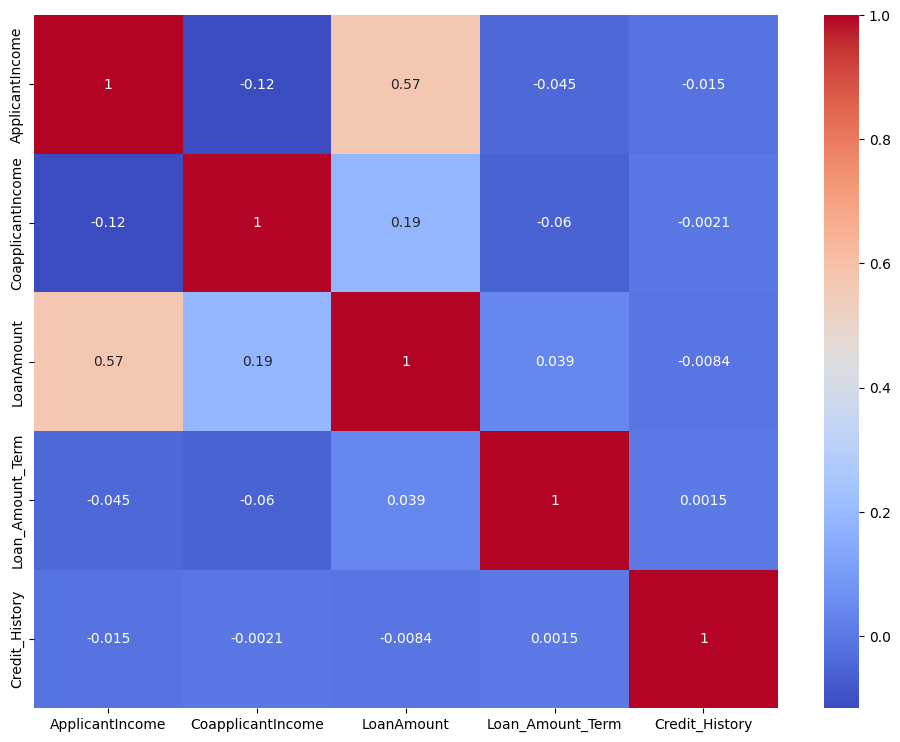

In [880]:
# lets check which input matrix effect the column 
corr=train.corr()
plt.figure(figsize=(12,9))
sns.heatmap(corr, annot=True, cmap='coolwarm')

 The corr() matrix only show their relationship between the numerical values or non-categorical variables

# DATA DISTRIBUTION IN TRAIN AND TEST

In [881]:
train=df.iloc[0:train_len,:]
test=df.iloc[train_len:,:]

In [882]:
test.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,Total_Income
614,1,1,0,0,0,8.651899,0.000000,4.966415,5.838319,1.0,2,2,8.651899
615,1,1,1,0,0,8.031710,7.313887,4.966415,5.838319,1.0,2,2,15.345597
616,1,1,2,0,0,8.517393,7.496097,4.966415,5.838319,1.0,2,2,16.013491
617,1,1,2,0,0,7.758333,7.842671,4.966415,5.838319,1.0,2,2,15.601005
618,1,0,0,1,0,8.094684,0.000000,4.966415,5.838319,1.0,2,2,8.094684


In [883]:
train.tail()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,Total_Income
609,0,0,0,0,0,7.972811,0.000000,4.966415,5.838319,1.0,0,1,7.972811
610,1,1,3,0,0,8.320448,0.000000,4.966415,5.838319,1.0,0,1,8.320448
611,1,1,1,0,0,8.996280,5.484797,4.966415,5.838319,1.0,2,1,14.481077
612,1,1,2,0,0,8.933796,0.000000,4.966415,5.838319,1.0,2,1,8.933796
613,0,0,0,0,1,8.430327,0.000000,4.966415,5.838319,0.0,1,0,8.430327


In [884]:
X=train.drop(columns=['Loan_Status'],axis=1)
y=train['Loan_Status']
X.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Total_Income
0,1,0,0,0,0,8.674197,0.000000,4.966415,5.838319,1.0,2,8.674197
1,1,1,1,0,0,8.430327,7.319202,4.966415,5.838319,1.0,0,15.749530
2,1,1,0,0,1,8.006701,0.000000,4.966415,5.838319,1.0,2,8.006701
3,1,1,0,1,0,7.857094,7.765993,4.966415,5.838319,1.0,2,15.623087
4,1,0,0,0,0,8.699681,0.000000,4.966415,5.838319,1.0,2,8.699681


# Model Training

In [885]:
from sklearn.model_selection import train_test_split,cross_val_score

In [886]:
#classify column
def classify(model):
    x_train,x_test,y_train,y_test = train_test_split(X,y,test_size=0.20,random_state=42)
    model.fit(x_train,y_train)
    print("Acuracy : ", model.score(x_test,y_test))
    
    score=cross_val_score(model,X,y, cv=5)
    print("CV_score : ",np.mean(score))

In [887]:
from sklearn.linear_model import LogisticRegression
model=LogisticRegression()
classify(model)

Acuracy :  0.7886178861788617
CV_score :  0.809462881514061


In [888]:
from sklearn.tree import DecisionTreeClassifier
model=DecisionTreeClassifier()
classify(model)

Acuracy :  0.7073170731707317
CV_score :  0.7280687724910035


In [889]:
from sklearn.ensemble import RandomForestClassifier
model=RandomForestClassifier()
classify(model)

Acuracy :  0.7642276422764228
CV_score :  0.7801812608290017


In [890]:
from sklearn.neighbors import KNeighborsClassifier
model=KNeighborsClassifier()
classify(model)

Acuracy :  0.6910569105691057
CV_score :  0.7280554444888712
